Para esta segunda aproximación del problema me voy a basar en la siguiente entrada:

https://machinelearningmastery.com/develop-a-deep-learning-caption-generation-model-in-python/

Primero comenzamos cargando las features de las imágenes con una VGG16 a la que quitamos la última capa, la de clasificación.

In [2]:
!wget http://nlp.cs.illinois.edu/HockenmaierGroup/Framing_Image_Description/Flickr8k_Dataset.zip
!unzip -q Flickr8k_Dataset.zip
!ls -la

--2018-06-28 17:22:39--  http://nlp.cs.illinois.edu/HockenmaierGroup/Framing_Image_Description/Flickr8k_Dataset.zip
Resolving nlp.cs.illinois.edu (nlp.cs.illinois.edu)... 192.17.58.132
Connecting to nlp.cs.illinois.edu (nlp.cs.illinois.edu)|192.17.58.132|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1115419746 (1.0G) [application/zip]
Saving to: ‘Flickr8k_Dataset.zip’

Flickr8k_Dataset.zi 100%[===================>]   1.04G   111MB/s    in 10s     

2018-06-28 17:22:49 (105 MB/s) - ‘Flickr8k_Dataset.zip’ saved [1115419746/1115419746]

total 1089748
drwxr-xr-x 1 root root       4096 Jun 28 17:22 .
drwxr-xr-x 1 root root       4096 Jun 28 17:20 ..
drwx------ 4 root root       4096 Jun 28 17:22 .cache
drwxr-xr-x 3 root root       4096 Jun 28 17:22 .config
drwxr-xr-x 3 root root       4096 Jun 25 16:59 datalab
drwxr-xr-x 2 root root     430080 Oct  3  2012 Flicker8k_Dataset
-rw-r--r-- 1 root root 1115419746 Oct 24  2013 Flickr8k_Dataset.zip
drwxr-xr-x 4 root root 

In [3]:
from os import listdir
from pickle import dump
from keras.applications.vgg16 import VGG16
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications.vgg16 import preprocess_input
from keras.models import Model
 
# extract features from each photo in the directory
def extract_features(directory):
	# load the model
	model = VGG16()
	# re-structure the model
	model.layers.pop()
	model = Model(inputs=model.inputs, outputs=model.layers[-1].output)
	# summarize
	print(model.summary())
	# extract features from each photo
	features = dict()
	for name in listdir(directory):
		# load an image from file
		filename = directory + '/' + name
		image = load_img(filename, target_size=(224, 224))
		# convert the image pixels to a numpy array
		image = img_to_array(image)
		# reshape data for the model
		image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
		# prepare the image for the VGG model
		image = preprocess_input(image)
		# get features
		feature = model.predict(image, verbose=0)
		# get image id
		image_id = name.split('.')[0]
		# store feature
		features[image_id] = feature
		print('>%s' % name)
	return features
 
# extract features from all images
directory = 'Flicker8k_Dataset'
features = extract_features(directory)
print('Extracted Features: %d' % len(features))
# save to file
dump(features, open('datalab/features.pkl', 'wb'))

Using TensorFlow backend.


553467904/553467096 [==============================] - 16s 0us/step
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_p

>2888732432_7e907a3df1.jpg
>2832076014_ff08c92037.jpg
>2248487950_c62d0c81a9.jpg
>3640422448_a0f42e4559.jpg
>3183883750_b6acc40397.jpg
>3457455611_94ee93929f.jpg
>3647446816_bd4383c828.jpg
>799199774_142b1c3bb2.jpg
>3266306177_7994dc2865.jpg
>288177922_b889f2e1fe.jpg
>3197791645_601908f26b.jpg
>3432637363_3ba357e2da.jpg
>2259203920_6b93b721ce.jpg
>3581538034_783b7d0d09.jpg
>2868668723_0741222b23.jpg
>2085078076_b9db242d21.jpg
>498492764_fe276e505a.jpg
>2933643390_1c6086684b.jpg
>454691853_cc1e0fa6a1.jpg
>3675685612_3987d91d92.jpg
>3718076407_0b4588d7bc.jpg
>2653552905_4301449235.jpg
>109823394_83fcb735e1.jpg
>2371749487_d80195a2e7.jpg
>3382105769_b1a4e4c60d.jpg
>3474912569_7165dc1d06.jpg
>1418503947_953d373632.jpg
>3522349685_f046f0e250.jpg
>2303951441_3c8080907a.jpg
>2931254547_e97c6d0d63.jpg
>3320356356_1497e53f80.jpg
>2456907314_49bc4591c4.jpg
>354642192_3b7666a2dd.jpg
>2704934519_457dc38986.jpg
>130211457_be3f6b335d.jpg
>2741051940_89fb6b2cee.jpg
>2271667421_7b21fc23b8.jpg
>3123463

>548751378_c657401312.jpg
>900144365_03cd1899e3.jpg
>2362377137_9528692825.jpg
>970641406_9a20ee636a.jpg
>3168354472_866fe70d36.jpg
>3310067561_b92017acab.jpg
>2972929655_04233b5489.jpg
>2346402952_e47d0065b6.jpg
>3480051754_18e5802558.jpg
>2938120171_970564e3d8.jpg
>3362871440_6c0f27c480.jpg
>2670637584_d96efb8afa.jpg
>407008823_bdd7fc6ed5.jpg
>3733074526_82aa8d5f8d.jpg
>3391924827_53b31542ce.jpg
>2920305300_a5b1b2329a.jpg
>2642474867_4e6346f809.jpg
>3635177305_bfbe1fc348.jpg
>2596474836_79468f23a0.jpg
>3574627719_790325430e.jpg
>3110018626_307a123b59.jpg
>2261550615_b6c25d987b.jpg
>2219805677_7b7cc188c7.jpg
>314904143_5a216a192b.jpg
>2879241506_b421536330.jpg
>3652764505_87139e71f8.jpg
>2698487246_e827404cac.jpg
>2705947033_5999147842.jpg
>2503629305_055e9ec4b1.jpg
>3323988406_e3c8fce690.jpg
>2982881046_45765ced2c.jpg
>411863595_d77156687e.jpg
>3336211088_4c294a870b.jpg
>2878190821_6e4e03dc5f.jpg
>3255482333_5bcee79f7e.jpg
>3364797223_1f0b2f98ed.jpg
>3360876049_9047edeab9.jpg
>280510

>3621652774_fd9634bd5b.jpg
>2673148534_8daf0de833.jpg
>2548777800_d7b9cf1c2b.jpg
>3207654194_43d6bebd68.jpg
>2987328689_96a2d814f1.jpg
>1262583859_653f1469a9.jpg
>3239480519_22540b5016.jpg
>3461677493_5bfb73038e.jpg
>539667015_fd0a3bea07.jpg
>1301140633_046e4e8010.jpg
>3084010872_cbc3ea8239.jpg
>2804851816_9aae9071ca.jpg
>805682444_90ed9e1ef3.jpg
>441212506_fcc321ac28.jpg
>3334300164_e75e0479ae.jpg
>1312227131_771b5ed201.jpg
>2613993276_3c365cca12.jpg
>2156131463_5b53636cf0.jpg
>321229104_3cbaf0f51c.jpg
>2833582518_074bef3ed6.jpg
>3124964754_2e8a98fb09.jpg
>270864951_1737ae5479.jpg
>3362189985_fbae8f860a.jpg
>236095034_c983bdfbbf.jpg
>3500139659_b2a60b0141.jpg
>466176275_f40d37851e.jpg
>232193739_ed5f348c7a.jpg
>241347689_d0b1ac297d.jpg
>247617035_9f2e821534.jpg
>3677734351_63d60844cb.jpg
>3397310901_cbef5c06ef.jpg
>3676460610_8c52e8a355.jpg
>2812125355_5e11a76533.jpg
>3681324243_b69fa90842.jpg
>1148238960_f8cacec2fc.jpg
>3272071680_648a99f7d2.jpg
>1813777902_07d1d4b00c.jpg
>373219198_

>2991575785_bd4868e215.jpg
>507758961_e63ca126cc.jpg
>2414390475_28a0107bb0.jpg
>1643915227_9f48068772.jpg
>2975807155_5a8610c297.jpg
>3176498130_52ab9460b2.jpg
>2466495935_623b144183.jpg
>3242088278_43eea5d17e.jpg
>375171241_0302ad8481.jpg
>3534512991_f9fd66f165.jpg
>2775744946_1ab5d500a2.jpg
>282131366_5f9a39c43c.jpg
>69710415_5c2bfb1058.jpg
>3741827382_71e93298d0.jpg
>2490365757_b869282cb3.jpg
>1932314876_9cc46fd054.jpg
>2696951725_e0ae54f6da.jpg
>3278811919_d5a3432af6.jpg
>3656206975_09e6ce58bd.jpg
>3138399980_d6ab8b2272.jpg
>3638783842_af08dbb518.jpg
>2338627102_6708a9b4fd.jpg
>3242919570_39a05aa2ee.jpg
>90011335_cfdf9674c2.jpg
>3451523035_b61d79f6a8.jpg
>3677964239_6406ed096f.jpg
>2511019188_ca71775f2d.jpg
>3325157569_8084ab3293.jpg
>3477683327_d9e6a2a64f.jpg
>289616152_012a9f16c6.jpg
>3196995975_3e38eabf01.jpg
>3415003392_139c0f3586.jpg
>3478084305_9e1219c3b6.jpg
>248174959_2522871152.jpg
>2194495372_bdac7d9e71.jpg
>3134644844_493eec6cdc.jpg
>2273591668_069dcb4641.jpg
>355731648

>3594029059_cee1f4c59a.jpg
>3498482871_4e02f31c35.jpg
>519228867_2fd25e38d4.jpg
>640409060_6af18fdd54.jpg
>2328616978_fb21be2b87.jpg
>236476706_175081ce18.jpg
>2172526745_649f420569.jpg
>1370615506_2b96105ca3.jpg
>1745110280_0cbff5e273.jpg
>2328106090_b7c2725501.jpg
>3659686168_49c3abcee1.jpg
>3545427060_c16a8b7dfd.jpg
>509778093_21236bb64d.jpg
>3687062281_e62f70baf3.jpg
>3547704737_57d42d5d9d.jpg
>3415165462_e1cb536d08.jpg
>3326454455_960e5442e9.jpg
>1507563902_6ec8d5d822.jpg
>3187096035_65dc416291.jpg
>2218843713_cf28ea319e.jpg
>3333826465_9c84c1b3c6.jpg
>319847643_df7c2a1d25.jpg
>2974587819_742fb7c338.jpg
>27782020_4dab210360.jpg
>3436418401_b00ceb27c0.jpg
>495054019_3dee8a02f5.jpg
>3012513414_86180c44cb.jpg
>3304556387_203b9d4db0.jpg
>2616643090_4f2d2d1a44.jpg
>1389264266_8170bc1c54.jpg
>3183777589_460a4f445b.jpg
>485312202_784508f2a9.jpg
>3741462565_cc35966b7a.jpg
>3535372414_4c51c86fc4.jpg
>2819254573_9ecb5f4d5e.jpg
>1663454406_5e2cf8c5bb.jpg
>468871328_72990babd4.jpg
>3091912922

>3230101918_7d81cb0fc8.jpg
>2667783499_3a4f38f636.jpg
>2491343114_a3e35a2a3a.jpg
>1247181182_35cabd76f3.jpg
>566794036_60f7acdf35.jpg
>1115565519_d976d4b1f1.jpg
>2363100645_c3423a0433.jpg
>3282634762_2650d0088a.jpg
>464506846_1734302b58.jpg
>1688699579_2f72328c7e.jpg
>315436114_6d386b8c36.jpg
>521186251_e97d1f50f8.jpg
>3221815947_76c95b50b7.jpg
>445655284_c29e6d7323.jpg
>2510020918_b2ca0fb2aa.jpg
>3242808166_8638150274.jpg
>3175712926_5a470d0886.jpg
>3635194562_4c1dfa120a.jpg
>2735558076_0d7bbc18fc.jpg
>3166969425_b5ace2f9c2.jpg
>3476451861_5b9c9ce191.jpg
>3183875944_b2be694e06.jpg
>2480668859_6f9b46be6a.jpg
>3359551687_68f2f0212a.jpg
>2986620935_e97763983d.jpg
>2213113526_beeb4f9bdc.jpg
>3728015645_b43a60258b.jpg
>1398873613_7e3174dd6c.jpg
>3174713468_e22fa7779e.jpg
>1143373711_2e90b7b799.jpg
>3690883532_d883f34617.jpg
>2834752476_3177e617f1.jpg
>3500115252_9404c066a8.jpg
>3030079705_0dee8a3e89.jpg
>2674784195_704f6b79d0.jpg
>771048251_602e5e8f45.jpg
>3094568845_d0b56c5651.jpg
>300222

>3547499166_67fb4af4ea.jpg
>3549277110_24d4064ccd.jpg
>2542037086_58c833699c.jpg
>2162469360_ff777edc95.jpg
>3669564923_8fcb1a6eff.jpg
>533713007_bf9f3e25b4.jpg
>1806580620_a8fe0fb9f8.jpg
>2574230252_f5a1382dd4.jpg
>3319899418_4bcf1b00d8.jpg
>3286198467_8880be127e.jpg
>3347500603_13670ee6bf.jpg
>2504764590_cf017c2a6e.jpg
>3065468339_4955e90fd3.jpg
>2836325261_a3bf5c59be.jpg
>421316045_ae7a1eb4bc.jpg
>3051341320_1d0166e775.jpg
>3301021288_95935b7a74.jpg
>3255620561_7644747791.jpg
>3477715432_79d82487bb.jpg
>3551787566_b5ebbe2440.jpg
>1143882946_1898d2eeb9.jpg
>783353797_fdf91bdf4c.jpg
>3366904106_e996320d20.jpg
>870710405_51e507b31a.jpg
>2856700531_312528eea4.jpg
>2970183443_accd597e0a.jpg
>2773682293_3b712e47ff.jpg
>2514612680_b0d2d77099.jpg
>3264678536_46601d25f0.jpg
>3526805681_38461c0d5d.jpg
>1812525037_528465037c.jpg
>442594271_2c3dd38483.jpg
>3563668905_689ed479c5.jpg
>3685328542_ab999b83bb.jpg
>2765029348_667111fc30.jpg
>3639105305_bd9cb2d1db.jpg
>3522076584_7c603d2ac5.jpg
>26149

>2393924525_1bf45ca217.jpg
>2802337003_56e555cd30.jpg
>315880837_90db309bab.jpg
>312156254_ef31dca5ed.jpg
>495055747_a75872762a.jpg
>1454678644_7e5a371301.jpg
>3066338314_2c3fb731d1.jpg
>3295024992_887a95c700.jpg
>2041867793_552819a40b.jpg
>2903469015_a1e7d969c2.jpg
>2451285022_59255e7fd9.jpg
>1317292658_ba29330a0b.jpg
>3080056515_3013830309.jpg
>1924234308_c9ddcf206d.jpg
>2915183095_4ed4aa4f37.jpg
>1280320287_b2a4b9b7bd.jpg
>2937497894_e3664a9513.jpg
>3564312955_716e86c48b.jpg
>235065283_1f9a3c79db.jpg
>2659554389_ed3d15093f.jpg
>3640348910_fcd627ec66.jpg
>872622575_ba1d3632cc.jpg
>2054869561_ff723e9eab.jpg
>2602258549_7401a3cdae.jpg
>3516935867_78cf63c69c.jpg
>3515665835_22e6fb1193.jpg
>127488876_f2d2a89588.jpg
>437054333_5c2761b8cd.jpg
>518144037_9a1754b2a6.jpg
>3355756569_b430a29c2a.jpg
>2623560640_0445c9a138.jpg
>3450874870_c4dcf58fb3.jpg
>956164675_9ee084364e.jpg
>1936215201_d03a75cbba.jpg
>3588417747_b152a51c52.jpg
>2130851544_d36f4f2ea6.jpg
>3522000960_47415c3890.jpg
>327146846

>3285180819_a9712fd2bc.jpg
>247618600_239eeac405.jpg
>3117562746_62f57a02b5.jpg
>489865145_65ea6d1c14.jpg
>2525666287_638ab5e784.jpg
>2938875913_0ed920a6be.jpg
>3244734844_c318c29c23.jpg
>3420338549_bd78d35243.jpg
>3532587748_7e64bb223a.jpg
>2070831523_5035d5537e.jpg
>3528902357_be2357a906.jpg
>1303550623_cb43ac044a.jpg
>271177682_48da79ab33.jpg
>3004291289_c4892898ae.jpg
>326585030_e1dcca2562.jpg
>3397633339_d1ae6d9a0e.jpg
>3391209042_d2de8a8978.jpg
>382090166_be2c2c63e1.jpg
>470887795_8443ce53d0.jpg
>179009558_69be522c63.jpg
>3365198533_539073002b.jpg
>3321516504_5ee97771cb.jpg
>934375844_dd149fed18.jpg
>2432709509_2a4d0c833f.jpg
>3577235421_69e4efb8d1.jpg
>3138746531_f6b816c126.jpg
>3351360323_91bb341350.jpg
>3178300150_d4605ff02c.jpg
>2305437797_e6c3460190.jpg
>1174525839_7c1e6cfa86.jpg
>2696866120_254a0345bc.jpg
>3538527033_df13112d51.jpg
>3413973568_6630e5cdac.jpg
>2135360514_7dcb9ed796.jpg
>1461667284_041c8a2475.jpg
>2656890977_7a9f0e4138.jpg
>2191329761_3effd856c5.jpg
>34750922

>945509052_740bb19bc3.jpg
>3364026240_645d533fda.jpg
>3240014971_ee2ea8406f.jpg
>3457784061_8f77f43a9c.jpg
>478208896_90e7187b64.jpg
>957230475_48f4285ffe.jpg
>2635400219_2e1a984fd3.jpg
>241347580_a1e20321d3.jpg
>3475552729_a3abd81ee6.jpg
>3307978046_92fef4dfa9.jpg
>3349307529_c1a516b9dc.jpg
>431018958_84b2beebff.jpg
>278608022_4175813019.jpg
>248858242_1c33c54ada.jpg
>2381583688_a6dd0a7279.jpg
>264859622_f3a00ab409.jpg
>2072574835_febf0c5fb9.jpg
>2251747182_6b67a3ab8b.jpg
>2618538137_44fffe10c4.jpg
>3121482932_f77ca12c01.jpg
>306315650_e064f5c677.jpg
>2281075738_230892b241.jpg
>2208631481_3e4a5675e1.jpg
>2665461736_595c87f0a3.jpg
>2766926202_4201bf2bf9.jpg
>3556598205_86c180769d.jpg
>390992388_d74daee638.jpg
>241347391_4fcd4639f4.jpg
>3247500085_c4f641aa84.jpg
>2045023435_181854c013.jpg
>2968216482_ede65b20a8.jpg
>2839932205_3c9c27cd99.jpg
>3621329299_6fb3f2935c.jpg
>1923476156_e20976b32d.jpg
>3174156702_95a1cda2d9.jpg
>696663662_232edd58af.jpg
>2937697444_2367ff0e28.jpg
>2331510788_9

>3474406285_01f3d24b71.jpg
>3043908909_bb54d2c08e.jpg
>3181701312_70a379ab6e.jpg
>581419370_30485f3580.jpg
>3538213870_9856a76b2a.jpg
>2167644298_100ca79f54.jpg
>2144050118_3e7d2e05b1.jpg
>3231751379_10ebf7150c.jpg
>2090327868_9f99e2740d.jpg
>3708244207_0d3a2b2f92.jpg
>733172023_5810350af6.jpg
>136552115_6dc3e7231c.jpg
>2460134050_06de9f5c4a.jpg
>2904601886_39e9d317b1.jpg
>1680126311_b92a2e8e72.jpg
>3027399066_ca85495775.jpg
>3176131893_7181c733aa.jpg
>894928353_002a3d5f06.jpg
>3091921457_83eee69591.jpg
>3254645823_a7c072481c.jpg
>3268175963_113d90d178.jpg
>1244306891_8e78ae1620.jpg
>2910758605_73a3f5a5c2.jpg
>457631171_12b1aee828.jpg
>2817847072_5eb3bc30ac.jpg
>2623930900_b9df917b82.jpg
>538825260_a4a8784b75.jpg
>3657016761_d553e514d9.jpg
>3506560025_8d0f4f9ac4.jpg
>1980882959_9a161f3469.jpg
>3074842262_62b1b2168c.jpg
>2863848437_f2592ab42d.jpg
>2825668136_107223182c.jpg
>134724228_30408cd77f.jpg
>391723162_3bdeb7ea33.jpg
>781118358_19087c9ec0.jpg
>2110692070_8aaaa1ae39.jpg
>44856031_

>2220175999_081aa9cce8.jpg
>232874193_c691df882d.jpg
>1432179046_8e3d75cf81.jpg
>2044063458_fcc76a7636.jpg
>3638374272_444f5e0457.jpg
>3672057606_cb6393dbd9.jpg
>2597873827_a5cb3e57ba.jpg
>1067790824_f3cc97239b.jpg
>2165461920_1a4144eb2b.jpg
>466956209_2ffcea3941.jpg
>3240048764_acce8af2a5.jpg
>3005872315_e6771763bd.jpg
>2447284966_d6bbdb4b6e.jpg
>997338199_7343367d7f.jpg
>2746839158_4195210d27.jpg
>3611672054_45edd3e08f.jpg
>3143980056_7a64a94b58.jpg
>3675825945_96b2916959.jpg
>1408958345_68eea9a4e4.jpg
>3189251454_03b76c2e92.jpg
>3462165890_c13ce13eff.jpg
>3232470286_903a61ea16.jpg
>1517340899_ee1c74a8f6.jpg
>2869765795_21a398cb24.jpg
>497122685_a51b29dc46.jpg
>3613667665_1881c689ea.jpg
>2699426519_228719b1db.jpg
>2602279427_191773c9e2.jpg
>2540360421_f7c2401da8.jpg
>3374223949_90776ba934.jpg
>1773928579_5664a810dc.jpg
>3551003620_0b02d76f65.jpg
>398413603_166896900f.jpg
>3671262694_29fbeb9d95.jpg
>3416091866_a96003d652.jpg
>1468389504_c724bdcad0.jpg
>1510669311_75330b4781.jpg
>33424

>3471571540_b4ab77f20d.jpg
>2185793891_5a5e903ca6.jpg
>3105691757_817083b0a6.jpg
>2029280005_a19609c81a.jpg
>670609997_5c7fdb3f0b.jpg
>3016651969_746bd36e68.jpg
>3019917636_4e0bb0acc4.jpg
>3649916507_b88a3d2082.jpg
>3712742641_641282803e.jpg
>3724718895_bd03f4a4dc.jpg
>1685463722_55843b6d3c.jpg
>3424424006_98f9d1921c.jpg
>2553024095_735bc46267.jpg
>3486340101_ff01d8f3f9.jpg
>109671650_f7bbc297fa.jpg
>258476074_f28f4a1ae6.jpg
>3455898176_f0e003ce58.jpg
>2394824046_51cec8e5e7.jpg
>2085400856_ae09df33a7.jpg
>3211581957_df2f7e2236.jpg
>1117972841_2b9261f95f.jpg
>1417295167_5299df6db8.jpg
>506738508_327efdf9c3.jpg
>3273163189_dece7babf4.jpg
>2543247940_083f1b7969.jpg
>3169591322_d0b6d0cd04.jpg
>2670560883_7e7b563092.jpg
>947664583_7c63172366.jpg
>2501968935_02f2cd8079.jpg
>3227423095_5049951eab.jpg
>3451345621_fe470d4cf8.jpg
>3523874798_9ba2fa46e3.jpg
>3381392182_db2c42430e.jpg
>3335501468_628655d608.jpg
>2612608861_92beaa3d0b.jpg
>3727752439_907795603b.jpg
>3707990914_843e8f15f1.jpg
>19652

>3673035152_da7ed916d9.jpg
>3281580623_8c3ba0fdb2.jpg
>2483993772_f64e9e4724.jpg
>2923891109_ea0cc932ed.jpg
>2938316391_97382d14aa.jpg
>3608663656_9192a21eeb.jpg
>3458559770_12cf9f134e.jpg
>262439544_e71cd26b24.jpg
>404216567_75b50b5a36.jpg
>3211453055_05cbfe37cd.jpg
>3429194423_98e911a101.jpg
>3453544202_3855ab34b6.jpg
>2596475173_58f11fc583.jpg
>3574930742_9081bd2426.jpg
>2527713011_b0ec25aa54.jpg
>2987121689_f9de6c479b.jpg
>2698614194_b4e6e11dff.jpg
>3153828367_5fc2c37c07.jpg
>2862509442_4f5dc96dca.jpg
>2204550058_2707d92338.jpg
>3467073304_aefe553c4d.jpg
>3249738122_decde6c117.jpg
>3214151585_f2d0b00b41.jpg
>1472653060_7427d2865a.jpg
>503717911_fc43cb3cf9.jpg
>2597737483_6518a230e4.jpg
>3092200805_dd1f83ddbe.jpg
>263233914_d25004e4cd.jpg
>3718007650_e5930b4509.jpg
>456299217_b2802efbc2.jpg
>3376942201_2c45d99237.jpg
>3262793378_773b21ec19.jpg
>3189293145_35dea42679.jpg
>3533922605_a2b1e276f6.jpg
>2273871383_1ddb3562ea.jpg
>138718600_f430ebca17.jpg
>2844018783_524b08e5aa.jpg
>343347

>3206919175_e3a11b6874.jpg
>401079494_562454c4d6.jpg
>3191982761_88793192ed.jpg
>3441701164_6dbbdf1bce.jpg
>2862931640_2501bd36c5.jpg
>3513362553_5fc5779e20.jpg
>3597210806_95b07bb968.jpg
>427167162_2c99779444.jpg
>2402744031_11f9f2f2b8.jpg
>3542341321_faa2d2d48a.jpg
>2978409165_acc4f29a40.jpg
>640203018_c0e7175831.jpg
>3399843227_3b9d2a8dbf.jpg
>1289142574_2bd6a082dd.jpg
>3123770450_cedc16d162.jpg
>2871962580_b85ce502ba.jpg
>636503038_17ca82b50f.jpg
>3240094420_a9eea11d39.jpg
>2355578735_286af5b202.jpg
>3681575323_433d007650.jpg
>3244586044_205d5ae2ba.jpg
>424869823_7aec015d87.jpg
>2998861375_02817e0147.jpg
>1149179852_acad4d7300.jpg
>3582914905_f58db879ae.jpg
>3550459890_161f436c8d.jpg
>2695962887_a1647c567b.jpg
>751074141_feafc7b16c.jpg
>2776029171_5abdd5a22f.jpg
>262681159_e5fed3acf0.jpg
>262642489_f5c6b9e65b.jpg
>3401548798_3a93f2caa5.jpg
>565605894_8f0bed0438.jpg
>2277081067_d2b4c98bce.jpg
>1057089366_ca83da0877.jpg
>3454315016_f1e30d4676.jpg
>2171154778_8189169336.jpg
>320935061

>387830531_e89c192b92.jpg
>3620343911_64a862904e.jpg
>2838085973_42b6e9b5b1.jpg
>300274198_eefd8e057e.jpg
>2428275562_4bde2bc5ea.jpg
>3524436870_7670df68e8.jpg
>3677514746_26f5588150.jpg
>2774362575_7543b8bf19.jpg
>134894450_dadea45d65.jpg
>1290894194_8a4ffdc7eb.jpg
>2288530008_4ebcee2174.jpg
>3086790344_9487c58624.jpg
>2764178773_d63b502812.jpg
>2059842472_f4fb61ea08.jpg
>2354792215_eef2bdc753.jpg
>3760400645_3ba51d27f9.jpg
>429851331_b248ca01cd.jpg
>2896640216_761a47f006.jpg
>3517466790_17c7753a1a.jpg
>3544233095_4bca71df1d.jpg
>2709536455_2a6046e38a.jpg
>472661386_723aae880b.jpg
>2181117039_c4eea8036e.jpg
>3501936223_6122a13d27.jpg
>3710520638_866d542a80.jpg
>3214237686_6566b8b52f.jpg
>2569643552_23696a9ba5.jpg
>3671935691_57bdd0e778.jpg
>3614595423_f9e0ab4fb0.jpg
>305749904_54a612fd1a.jpg
>94232465_a135df2711.jpg
>3422979565_e08cd77bfe.jpg
>3243233886_235a80e8c7.jpg
>2893515010_4a3d9dcc67.jpg
>3337332770_5eda5cceb7.jpg
>294353408_d459bdaa68.jpg
>3002920707_5d2e6e6aac.jpg
>812196663

>3593220756_5c416c3ceb.jpg
>3397228832_8ce5b1c26f.jpg
>3399944164_ec24123945.jpg
>3456579559_b5c8927938.jpg
>2077346067_0a3a5aae65.jpg
>3472485022_5d03e9852d.jpg
>3603064161_a8f3b6455d.jpg
>50030244_02cd4de372.jpg
>2969380952_9f1eb7f93b.jpg
>429270993_294ba8e64c.jpg
>3587009091_37188fd07e.jpg
>1419286010_b59af3962a.jpg
>375384566_254c2362d4.jpg
>1394927474_0afdd82fc4.jpg
>3532028205_9ddd7599f8.jpg
>3420323191_d66e003264.jpg
>2540750172_070250ece5.jpg
>380034515_4fbdfa6b26.jpg
>3477315700_52a4d740a5.jpg
>2978394277_4572967b97.jpg
>2855417531_521bf47b50.jpg
>269898095_d00ac7d7a4.jpg
>2158247955_484f0a1f11.jpg
>3301754574_465af5bf6d.jpg
>3262475923_f1f77fcd9f.jpg
>3330935489_9cb67ca36b.jpg
>365274901_576b0f8241.jpg
>3448490813_f9623e864d.jpg
>3204712107_5a06a81002.jpg
>3652150541_8fb5a3a5d1.jpg
>525863257_053333e612.jpg
>2655196158_5c878a4af0.jpg
>2110898123_07729c1461.jpg
>3326376344_3306bf439e.jpg
>1569562856_eedb5a0a1f.jpg
>427683329_95d510a087.jpg
>1286408831_05282582ed.jpg
>311988796

>2356574282_5078f08b58.jpg
>3155390408_8e1a81efb2.jpg
>574274795_57e0834e7d.jpg
>2286239223_d84ffc4e4a.jpg
>2922222717_12195af92d.jpg
>361092202_3d70144ebd.jpg
>2226534154_cbcab7ba32.jpg
>2595713720_30534e8de2.jpg
>3535879138_9281dc83d5.jpg
>3164415865_612f9fd8bc.jpg
>2205336881_d9ee4179d3.jpg
>3286406057_a1668655af.jpg
>2688902319_52ceaf4a2a.jpg
>3398745929_8cd3bbb8a8.jpg
>3351596152_bf283f03d1.jpg
>2830755303_2b5444ab4c.jpg
>2182488373_df73c7cc09.jpg
>3424934891_69f18da66e.jpg
>269630255_c3ec75c792.jpg
>2930318834_8366811283.jpg
>1361420539_e9599c60ae.jpg
>361183669_52be9662b9.jpg
>765091078_a8a11c6f9e.jpg
>3530687486_6e6be53602.jpg
>3051754615_3d6494c2ae.jpg
>3604391853_b4809fcb8c.jpg
>3634281981_d9cf1d1a33.jpg
>1786425974_c7c5ad6aa1.jpg
>166507476_9be5b9852a.jpg
>3384314832_dffc944152.jpg
>2038662925_f4fa8c2534.jpg
>417577408_eb571658c1.jpg
>405051459_3b3a3ba5b3.jpg
>3673970325_4e025069e9.jpg
>3199645963_a681fe04f8.jpg
>2174206711_11cb712a8d.jpg
>3583704941_611353857e.jpg
>28883861

>3331190056_09f4ca9fd2.jpg
>2797149878_bb8e27ecf9.jpg
>3247693965_845b3b4349.jpg
>2396691909_6b8c2f7c44.jpg
>3251646144_d9f4ccca3f.jpg
>2718049631_e7aa74cb9b.jpg
>3494105596_f05cb0d56f.jpg
>2621415349_ef1a7e73be.jpg
>2785115802_137fa30000.jpg
>498404951_527adba7b8.jpg
>3222749441_3bdfe088e3.jpg
>3148286846_40ae914172.jpg
>2567035103_3511020c8f.jpg
>2640153227_57cf1a3d92.jpg
>3269087421_1d489abeae.jpg
>3375549004_beee810e60.jpg
>2766325714_189bbff388.jpg
>3154813159_58a195236d.jpg
>2837808847_5407af1986.jpg
>3128164023_ebe8da4c32.jpg
>3672105509_53b13b2ed4.jpg
>3722572342_6904d11d52.jpg
>539744890_85e63f5854.jpg
>3630991662_990f397f7c.jpg
>516998046_1175674fcd.jpg
>2601008162_f00eeb5c14.jpg
>2887744223_029f2fd5fe.jpg
>3667822570_d39850e217.jpg
>2715035273_8fc8b1291c.jpg
>2165459064_5b81ff23eb.jpg
>733965014_1a0b2b5ee9.jpg
>1056873310_49c665eb22.jpg
>3132832452_c354c6396c.jpg
>3585598356_8ce815bbb9.jpg
>3599568766_9e96def0ef.jpg
>483136916_16976f4902.jpg
>3436259762_43709321ff.jpg
>35170

>3263741906_6e4508d1c8.jpg
>3174196837_800689a2f3.jpg
>1388346434_524d0b6dfa.jpg
>2757779501_c41c86a595.jpg
>3726120436_740bda8416.jpg
>3144705706_391d7b77c7.jpg
>2450299735_62c095f40e.jpg
>523327429_af093fc7cf.jpg
>3457856049_2de173e818.jpg
>2876993733_cb26107d18.jpg
>2775249812_f4db95e818.jpg
>482882307_7dcb9eee11.jpg
>2830869109_c4e403eae6.jpg
>475816542_f5c2736815.jpg
>2773011586_6f4cd41e84.jpg
>3337046794_296bd2c7e0.jpg
>406901451_7eafd7568a.jpg
>2950393735_9969c4ec59.jpg
>23445819_3a458716c1.jpg
>2552723989_7bc93e0f7b.jpg
>2505465055_f1e6cf9b76.jpg
>3188319076_71724fcc07.jpg
>3497069793_2d4baf5b4b.jpg
>3155361712_2cbf59c78e.jpg
>3029715635_43ab414dfb.jpg
>352981175_16ff5c07e4.jpg
>2685752892_9d5cd7f274.jpg
>3183519385_311555d5f5.jpg
>454686980_7517fe0c2e.jpg
>3298175192_bbef524ddc.jpg
>3437107047_715c60e9c8.jpg
>3459858555_c3f0087a72.jpg
>3004823335_9b82cbd8a7.jpg
>494921598_af73bda568.jpg
>2346523971_d3f1e12ce4.jpg
>3259666643_ae49524c81.jpg
>3092370204_029b6bc10a.jpg
>180506881

>2917843040_7c9caaaa8a.jpg
>3449718979_e987c64e2d.jpg
>866841633_05d273b96d.jpg
>214501174_6db1f4d69c.jpg
>3447155358_5b5b59b15e.jpg
>299676757_571ee47280.jpg
>3294830188_e46bd9b93c.jpg
>3340857141_85d97a7466.jpg
>3673878924_506c9d767b.jpg
>368212336_bc19b0bb72.jpg
>244910177_7c4ec3f65b.jpg
>2196050115_e236d91f52.jpg
>3421480658_b3518b6819.jpg
>2975073156_7543ed326f.jpg
>3730457171_e66dde8c91.jpg
>2579266054_1ec58aa92f.jpg
>2844846111_8c1cbfc75d.jpg
>235074044_c1358888ed.jpg
>514431934_9cf78f05a9.jpg
>3485425825_c2f3446e73.jpg
>2293424366_7b5fcd2398.jpg
>3079073247_97e88e2eb7.jpg
>2571096893_694ce79768.jpg
>3718892835_a3e74a3417.jpg
>3637013_c675de7705.jpg
>2449446913_28fa5b7c75.jpg
>2975253472_0f0c2dea70.jpg
>2390778197_4d9d03d4b9.jpg
>446286714_dcec7f339e.jpg
>2998185688_8d33e4ce38.jpg
>498794783_cc2ac62b47.jpg
>3512033861_a357bb58b6.jpg
>2736508369_fd9ff0b42f.jpg
>468608014_09fd20eb9b.jpg
>3564007203_df2b8010f1.jpg
>488590040_35a3e96c89.jpg
>3683185795_704f445bf4.jpg
>3050114829_18b

>3417231408_6ce951c011.jpg
>54723805_bcf7af3f16.jpg
>1255504166_f2437febcb.jpg
>3332136681_9aecf101fd.jpg
>468911753_cc595f5da0.jpg
>381239475_044cbffa2b.jpg
>2931950813_93145c4746.jpg
>3556390715_65c6d1e88b.jpg
>720208977_f44c2bba5b.jpg
>587604325_af5d6df679.jpg
>2642475077_69d19deb74.jpg
>3460458114_35037d4d4c.jpg
>816084977_21c1811c9a.jpg
>2760715910_87c7bdeb87.jpg
>2230067846_74046b89d3.jpg
>3638459638_ec74e3ff89.jpg
>2204277704_f1c8c741ed.jpg
>501699433_f8df386cf9.jpg
>1131340021_83f46b150a.jpg
>3187364311_4c2a87083b.jpg
>1683444418_815f660379.jpg
>3395173129_f0ac0a1ed4.jpg
>2186367337_0ce9ce2104.jpg
>241347150_5ff37818c2.jpg
>3203872773_6c30f64be3.jpg
>3540416981_4e74f08cbb.jpg
>3074265400_bf9e10621e.jpg
>3025546819_ce031d2fc3.jpg
>3581818450_546c89ca38.jpg
>486917990_72bd4069af.jpg
>3141440149_00becbbb93.jpg
>3342855466_44038a8aa3.jpg
>246901891_4c4ea49c3a.jpg
>3371567346_b6522efdb8.jpg
>2945036454_280fa5b29f.jpg
>3634785801_4b23184a06.jpg
>3443460885_46115463b4.jpg
>3301811927_

>3307147971_5b3abf61f9.jpg
>3147758035_e8a70818cb.jpg
>652542470_60e858da64.jpg
>138705546_be7a6845dd.jpg
>3103185190_eb8729c166.jpg
>2089542487_b4c1ee7025.jpg
>3717309680_e5105afa6d.jpg
>1104133405_c04a00707f.jpg
>2195419145_36722e8d54.jpg
>460935487_75b2da7854.jpg
>2860872588_f2c7b30e1a.jpg
>3287904625_f68ca5cea7.jpg
>2934379210_4e399e3cac.jpg
>441921713_1cafc7d7d2.jpg
>2726262796_03bd63a155.jpg
>661749711_6f408dad62.jpg
>462288558_b31a8a976f.jpg
>334768700_51c439b9ee.jpg
>2198511848_311d8a8c2f.jpg
>2676648667_cb055b4fc6.jpg
>2786245676_0a69543832.jpg
>3269661567_faf190885a.jpg
>3653837067_94050699ec.jpg
>386656845_4e77c3e3da.jpg
>2252123185_487f21e336.jpg
>2994107810_af56326389.jpg
>2603125422_659391f961.jpg
>3257103624_e76f25ff9e.jpg
>3695949492_27ca3892fd.jpg
>3423249426_02bedf9260.jpg
>2090545563_a4e66ec76b.jpg
>3504158556_1d410c8ff7.jpg
>508929192_670910fdd2.jpg
>3638440337_6d5c19a8f0.jpg
>387078972_514a38dc33.jpg
>140526327_3cb984de09.jpg
>3632572264_577703b384.jpg
>3191135894_

>3394750987_a32ecc477e.jpg
>3016708786_3591106cca.jpg
>2180356743_b3a3c9a7f6.jpg
>3649802021_8a689bc153.jpg
>2100046085_69b59b6645.jpg
>823697339_aadbeef495.jpg
>2517082705_93bc9f73ec.jpg
>2877424957_9beb1dc49a.jpg
>3512791890_eb065b460a.jpg
>3222842866_cb85243ce4.jpg
>2273038287_3004a72a34.jpg
>3106791484_13e18c33d8.jpg
>3399616238_77acf4ee12.jpg
>3309578722_1765d7d1af.jpg
>3025438110_40af7e6a80.jpg
>1107471216_4336c9b328.jpg
>316833109_6500b526dc.jpg
>3003612178_8230d65833.jpg
>2399551242_c62a46dd5f.jpg
>2706430695_3b5667741c.jpg
>2868136205_3cf679208d.jpg
>2894576909_99c85fd7a7.jpg
>2380765956_6313d8cae3.jpg
>3354883962_170d19bfe4.jpg
>2949353587_64c54e9589.jpg
>3613585080_36629d8157.jpg
>3159995270_17334ccb5b.jpg
>2433175169_da939372f2.jpg
>562588230_edb2c071c8.jpg
>708860480_1a956ae0f7.jpg
>1526181215_c1a94325ae.jpg
>2831723637_30d4456665.jpg
>460781612_6815c74d37.jpg
>2860040276_eac0aca4fc.jpg
>1516714577_7d1c35a8d8.jpg
>512045825_1be2083922.jpg
>2743652730_d909c7ae82.jpg
>344542

>2971431335_e192613db4.jpg
>244399048_8332bb3270.jpg
>1055623002_8195a43714.jpg
>2533642917_a5eace85e6.jpg
>3417662443_2eaea88977.jpg
>278388986_78ba84eb8f.jpg
>3215238223_29de2b35cb.jpg
>2475300106_b8563111ba.jpg
>481632457_7372f18275.jpg
>3197482764_2f289cb726.jpg
>2385744837_8780f6731a.jpg
>2309860995_c2e2a0feeb.jpg
>3103340819_46de7954a9.jpg
>3533484468_0787830d49.jpg
>3393926562_66cc01b001.jpg
>3435648640_b2f68efb78.jpg
>2346629210_8d6668d22d.jpg
>3307077951_dd31f1971c.jpg
>3602676311_824b2c04ba.jpg
>2447972568_1e9b287691.jpg
>3167365436_c379bda282.jpg
>172092464_d9eb4f4f2f.jpg
>2554570943_122da6438f.jpg
>2130986011_47cb05c8c9.jpg
>3389321512_b11f499dab.jpg
>3551281733_b43bf6f870.jpg
>2594336381_a93772823b.jpg
>1430154945_71bbaa094a.jpg
>128912885_8350d277a4.jpg
>3054200086_657d4398e8.jpg
>3690189273_927d42ff43.jpg
>542317719_ed4dd95dc2.jpg
>1835511273_790eaae6e6.jpg
>2422482455_b98d9c2120.jpg
>1370773415_967b1ffde1.jpg
>3612249030_e2829ffa31.jpg
>535309053_ec737abde8.jpg
>2312984

>2655183854_5852790214.jpg
>3105315670_5f86f73753.jpg
>3155657768_b83a7831e5.jpg
>1505686764_9e3bcd854a.jpg
>843616798_5ab0ecb525.jpg
>3100442775_6e2659b973.jpg
>3679502342_7fe6ef8a36.jpg
>3676788491_01e9bc5f15.jpg
>2909875716_25c8652614.jpg
>2769605231_dae8b30201.jpg
>3242263536_a436f19257.jpg
>2830880811_d7f66dd2cf.jpg
>512101751_05a6d93e19.jpg
>252846811_7b250935a7.jpg
>3227140905_1d7e30e4c4.jpg
>3371887001_44ab0c2f17.jpg
>394463341_5311c53783.jpg
>537758332_8beb9cf522.jpg
>3084001782_41a848df4e.jpg
>3146630574_05d9ebbed1.jpg
>2657301826_aab4c36e6c.jpg
>2021671653_567395c7cf.jpg
>3532200762_b28c39d311.jpg
>2854291706_d4c31dbf56.jpg
>3095225232_2e6e6dc92e.jpg
>3666574371_317b008d2a.jpg
>2564663851_3a9832e4fc.jpg
>2587106431_1cc0e719c6.jpg
>3454621502_73af6742fb.jpg
>3296150666_aae2f64348.jpg
>3354075558_3b67eaa502.jpg
>2079110798_ad1370a646.jpg
>3443703471_14845d8850.jpg
>837893113_81854e94e3.jpg
>3677329561_fa3e1fdcf9.jpg
>3437147889_4cf26dd525.jpg
>2246717855_c0c08fe5d2.jpg
>356154

>2151300603_248a9fe715.jpg
>3541474181_489f19fae7.jpg
>3544803461_a418ca611e.jpg
>769260947_02bc973d76.jpg
>478592803_f57cc9c461.jpg
>2437266971_b91a8f9a00.jpg
>19212715_20476497a3.jpg
>2562463210_d0dfd545ca.jpg
>496380034_d22aeeedb3.jpg
>2659183350_730951f740.jpg
>3171250845_5ae0d2a8bc.jpg
>2622624460_207dbcc4cf.jpg
>3053743109_a2d780c0d2.jpg
>2092870249_90e3f1855b.jpg
>3537452619_3bd79f24e0.jpg
>2095078658_c14ba89bc2.jpg
>3647283075_3005333222.jpg
>3070274658_fc39fd4f84.jpg
>2233426944_0959835ced.jpg
>3229282764_a4a515f4e2.jpg
>3372167201_f7f909d480.jpg
>508261758_78fb8ae067.jpg
>3223606402_bb2aa6db95.jpg
>452345346_afe1248586.jpg
>2964438493_413667c04a.jpg
>861795382_5145ad433d.jpg
>3368569524_a9df2fc312.jpg
>2393196444_8f4f540f5f.jpg
>3726590391_bc6e729bb6.jpg
>3123351642_3794f2f601.jpg
>3157622277_9f59b4f62f.jpg
>2050067751_22d2763fd2.jpg
>3376435746_1593d9b243.jpg
>2313822078_282dc07531.jpg
>3351493005_6e5030f596.jpg
>2245916742_73af13c733.jpg
>2526585002_10987a63f3.jpg
>18957689

>2256138896_3e24b0b28d.jpg
>2209888959_d636b1be0b.jpg
>1470536919_1f3fd6c65a.jpg
>3106782647_b078830a9e.jpg
>3381584882_341ee3092f.jpg
>2994104606_bc2df6c1f4.jpg
>2278766574_f71f1704a8.jpg
>3497106366_d1a256e723.jpg
>289860281_94d699f36d.jpg
>1446053356_a924b4893f.jpg
>3344233740_c010378da7.jpg
>3715469645_6d1dc019b3.jpg
>2106772874_381824648b.jpg
>2915538325_59e11276dd.jpg
>1521623639_4bda3407cc.jpg
>245252561_4f20f1c89e.jpg
>3109780402_dbae082dc5.jpg
>2498897831_0bbb5d5b51.jpg
>3298199743_d8dd8f94a0.jpg
>3296500180_0d7a6650dc.jpg
>2807209904_389d81f33a.jpg
>1077931201_1e0bb83105.jpg
>3275627207_0b41e44597.jpg
>3465606652_f380a38050.jpg
>460195978_fc522a4979.jpg
>3638908276_b1751d30ff.jpg
>261737543_b8fdc24671.jpg
>3546720729_38fff1bbd9.jpg
>3620492762_7f6a9b4746.jpg
>3590294974_4ef98f013e.jpg
>251958970_fa6b423f23.jpg
>3227499174_07feb26337.jpg
>2902661518_1513be3ea6.jpg
>3538686658_30afc75f02.jpg
>268704620_8a8cef4cb3.jpg
>3721881082_afe9fc734e.jpg
>241346317_be3f07bd2e.jpg
>1015118

>354999632_915ea81e53.jpg
>1394368714_3bc7c19969.jpg
>276356412_dfa01c3c9e.jpg
>270809922_043e3bef06.jpg
>3616771728_2c16bf8d85.jpg
>2144846312_d4c738dc6c.jpg
>2921578694_a46ae0d313.jpg
>3494394662_3edfd4a34c.jpg
>3226796100_08c49cfa5c.jpg
>2466171100_5e60cfcc11.jpg
>2873431806_86a56cdae8.jpg
>3268443910_b36dbc1e5c.jpg
>3437034427_6df5e9fbf9.jpg
>1562478713_505ab6d924.jpg
>3634032601_2236676cdd.jpg
>307327914_f98f576adb.jpg
>1383698008_8ac53ed7ec.jpg
>3032790880_d216197d55.jpg
>3262760716_1e9734f5ba.jpg
>2545192257_142fe9e2de.jpg
>2564888404_b57f89d3c7.jpg
>3490736665_38710f4b91.jpg
>2470588201_955132a946.jpg
>1580172290_e19067e0dd.jpg
>3046431231_dc48851062.jpg
>3677927146_1696f0b075.jpg
>2218743570_9d6614c51c.jpg
>244760289_f4467b2b67.jpg
>242559369_9ae90ed0b4.jpg
>3362805914_72f60ee8cb.jpg
>2650620212_0586016e0d.jpg
>1388373425_3c72b56639.jpg
>2795352290_9209b214f3.jpg
>3612484827_0e479f9ee8.jpg
>3632047678_f202609e50.jpg
>417966898_a04f9b5349.jpg
>2485467050_1d5e2696d4.jpg
>3132619

>3079786914_fe598b0e54.jpg
>2052702658_da1204f6d1.jpg
>3171066023_ec60ba30f3.jpg
>743571049_68080e8751.jpg
>511749704_3037806cb1.jpg
>2862676319_a9dab1309f.jpg
>2207244634_1db1a1890b.jpg
>2067362863_59577f9d4d.jpg
>143552697_af27e9acf5.jpg
>390992102_67fa31b22f.jpg
>1470061031_4cb59c12a8.jpg
>860928274_744d14f198.jpg
>2860035355_3fe7a5caa4.jpg
>512991147_dc48e6839c.jpg
>3591170729_406fdb74e5.jpg
>69710411_2cf537f61f.jpg
>3541141771_67d305c873.jpg
>2258662398_2797d0eca8.jpg
>856985136_649c0a3881.jpg
>2364774105_fbaf0c191f.jpg
>2097407245_c798e0dcaf.jpg
>2525270674_4ab536e7ec.jpg
>3103264875_2a8d534abc.jpg
>3413571342_b9855795e2.jpg
>3539840291_1c3eed701d.jpg
>3387542157_81bfd00072.jpg
>3484576025_a8c50942aa.jpg
>836828001_af98d16256.jpg
>150582765_bad8dec237.jpg
>2764732789_1392e962d0.jpg
>3249062399_0dafe5e4f5.jpg
>2367318629_b60cf4c4b3.jpg
>1510078253_96e9ec50e7.jpg
>2522467011_cc825d89ac.jpg
>3247423890_163f00a2cb.jpg
>2090723611_318031cfa5.jpg
>2618322793_5fb164d86a.jpg
>3418504074_

>1562392511_522a26063b.jpg
>3542418447_7c337360d6.jpg
>3405720825_b6991005eb.jpg
>3599124739_b7e60cf477.jpg
>1007320043_627395c3d8.jpg
>1801063894_60bce29e19.jpg
>2678612999_893ed671f8.jpg
>2987775031_3f9ac69319.jpg
>2924483864_cfdb900a13.jpg
>3154528397_89112faf4b.jpg
>3374384485_751f719be4.jpg
>2908512223_7e27631ed4.jpg
>2662537919_18a29fca8a.jpg
>3463034205_e541313038.jpg
>2130203183_49bae96b96.jpg
>3126752627_dc2d6674da.jpg
>3442242092_e579538d82.jpg
>3204354161_caf89ec784.jpg
>95728660_d47de66544.jpg
>2078311270_f01c9eaf4c.jpg
>2340206885_58754a799a.jpg
>2970067128_8842ab3603.jpg
>2472634822_7d5d2858c0.jpg
>195962284_e57178054a.jpg
>3590753142_61993d39df.jpg
>3255737244_1f8948fc07.jpg
>2710563762_06d48329d7.jpg
>2630507245_bea4804288.jpg
>911527312_f81ee36b97.jpg
>2968135512_51fbb56e3e.jpg
>3257182199_5fda78d870.jpg
>78984436_ad96eaa802.jpg
>3224904543_679fe05c41.jpg
>3516521516_9950340b96.jpg
>2882589788_cb0b407a8d.jpg
>2561295656_4f21fba209.jpg
>3392293702_ccb0599857.jpg
>157228

>3406802138_ef77bbddd0.jpg
>2160266952_a2ab39191b.jpg
>3425853460_bfcd0b41f6.jpg
>3259757648_71edb4347b.jpg
>2652522323_9218afd8c2.jpg
>390671130_09fdccd52f.jpg
>2676649969_482caed129.jpg
>405534893_2d0f3b0147.jpg
>3626998066_3ae11ee278.jpg
>3372214646_cc2ceb182f.jpg
>633456174_b768c1d6cd.jpg
>2394922193_310166d6af.jpg
>403678611_73978faed7.jpg
>3482062809_3b694322c4.jpg
>2623939135_0cd02ffa5d.jpg
>2602306033_2b3100d36b.jpg
>3212085754_35fdc9ccaa.jpg
>2218907190_5f43bf5e4d.jpg
>2800990525_a1f8427272.jpg
>285586547_c81f8905a1.jpg
>3072730593_b7322d2e05.jpg
>2942133798_e57c862a90.jpg
>1460352062_d64fb633e0.jpg
>2225231022_1632d0a5aa.jpg
>3188036349_8e4e2d6ca8.jpg
>2840344516_8e15fe2668.jpg
>2524084967_a5e011b73d.jpg
>1511807116_41c3645e8c.jpg
>3099504809_565e17e49d.jpg
>2559503010_84f20b3bc9.jpg
>1456630952_dd4778a48f.jpg
>2728813605_cfc943e1ab.jpg
>3706356018_28f62290e8.jpg
>2502905671_c6039804ab.jpg
>2609847254_0ec40c1cce.jpg
>2977379863_2e8d7a104e.jpg
>2831578193_3c997ae330.jpg
>25407

>3645080830_1d9ee2f50a.jpg
>2990977776_1ec51c9281.jpg
>3557148230_7fc843e5de.jpg
>3215117062_6e07a86352.jpg
>3429581486_4556471d1a.jpg
>3564157681_03a13b7112.jpg
>2126950128_74a4882658.jpg
>3631344685_ed0f3e091b.jpg
>964197865_0133acaeb4.jpg
>3638992163_a085cc0c24.jpg
>2756765580_9e57e10f0d.jpg
>3122497129_d08f5729b8.jpg
>1024138940_f1fefbdce1.jpg
>2293149170_38fb2257ea.jpg
>508432819_3d055f395d.jpg
>1119015538_e8e796281e.jpg
>370713359_7560808550.jpg
>3549997413_01388dece0.jpg
>391324644_d23fdf06cb.jpg
>3470951932_27ed74eb0b.jpg
>3375991133_87d7c40925.jpg
>3534668485_6887629ff0.jpg
>2707969386_94dde00ce4.jpg
>3716272233_7845ec5b3e.jpg
>2971211296_2587c3924d.jpg
>3042679440_010b2c596c.jpg
>3104690333_4314d979de.jpg
>241347204_007d83e252.jpg
>2565237642_bdd46d7cef.jpg
>3727740053_3baa94ffcb.jpg
>524031846_28b11bc0e5.jpg
>143688283_a96ded20f1.jpg
>693450725_8ad72389e6.jpg
>398662202_97e5819b79.jpg
>1394396709_65040d97ab.jpg
>2999730677_0cfa1c146e.jpg
>1752454466_723790dbd6.jpg
>210575645

>3203707977_cc9448fecb.jpg
>2749124446_d4432787b5.jpg
>217583047_5e93e1e119.jpg
>1931690777_897a7d8ab6.jpg
>3654869593_c8599a8e20.jpg
>3481859121_3d3e566ec0.jpg
>3294179574_4f67e67d6f.jpg
>3527261343_efa07ea596.jpg
>3410215754_5d5caeffaf.jpg
>1164765687_7aca07bbe7.jpg
>3576312396_799c873f3e.jpg
>2552816307_c7c8e7f6b4.jpg
>3519155763_045a6a55e2.jpg
>2728486640_cc2a31d2b0.jpg
>3326024473_4c16e4fbfc.jpg
>3170856184_efabfd0297.jpg
>1358892595_7a37c45788.jpg
>1309330801_aeeb23f1ee.jpg
>3157220149_cc3c8cc84d.jpg
>3674521435_89ff681074.jpg
>950411653_20d0335946.jpg
>2197275664_fabcf3424b.jpg
>1159574340_99ba8c3c59.jpg
>2201951969_0d7520d648.jpg
>3293751136_b0ce285dc3.jpg
>3462512074_2b4db1ffd6.jpg
>3016741474_72b4355198.jpg
>2333288869_8c01e4c859.jpg
>3758175529_81941e7cc9.jpg
>3555729342_cc7a3b67fd.jpg
>3610189629_f46de92ab3.jpg
>2473293833_78820d2eaa.jpg
>2070831281_dc04b3e15d.jpg
>449352117_63c359c6e7.jpg
>852469220_bc0fee3623.jpg
>510197538_0a11b94460.jpg
>2534502836_7a75305655.jpg
>26751

>2080033499_6be742f483.jpg
>3700554247_9824ae6f3a.jpg
>2735290454_1bd8bc5eac.jpg
>2671602981_4edde92658.jpg
>492802403_ba5246cfea.jpg
>3174431688_ae84778db0.jpg
>462198798_89e2df0358.jpg
>3287963317_186491ee78.jpg
>765298136_7805fbb079.jpg
>237277765_9e6fa5b99a.jpg
>1425069308_488e5fcf9d.jpg
>2500826039_165e75b20c.jpg
>3650986674_3e101c606b.jpg
>3597921737_3fd1d0665b.jpg
>2244551043_21b8cca866.jpg
>2716251485_d6113f4c8a.jpg
>752052256_243d111bf0.jpg
>3030223792_02b6f2be99.jpg
>2405978603_6221b0c2e7.jpg
>3042173467_14394234da.jpg
>2214132302_80064fd79d.jpg
>2506892928_7e79bec613.jpg
>3170110692_d1e0e66cee.jpg
>3231880001_193a579b97.jpg
>2162564553_96de62c7e6.jpg
>3250695024_93e8ab7305.jpg
>3014015906_fdba461f36.jpg
>2369248869_0266760c4a.jpg
>380515798_c2abbf46b0.jpg
>515335111_c4afd5b903.jpg
>3126681108_f88128699c.jpg
>2578161080_e007c9177a.jpg
>3182405529_7692256746.jpg
>1473618073_7db56a5237.jpg
>3357937209_cf4a9512ac.jpg
>2543679402_9359e1ee4e.jpg
>342872408_04a2832a1b.jpg
>39754734

>2502007071_82a8c639cf.jpg
>2973638173_0dc21fd443.jpg
>3598447435_f66cd10bd6.jpg
>1234293791_6566284bcd.jpg
>3312779887_7682db7827.jpg
>3211316116_a2462e327d.jpg
>2603690144_7a28b1d13c.jpg
>2607383384_d9ce9de793.jpg
>439492931_a96d590e40.jpg
>2272489996_95b0a62d15.jpg
>917574521_74fab68514.jpg
>1016887272_03199f49c4.jpg
>3600403707_527aa0596e.jpg
>2944952557_8484f0da8f.jpg
>252124738_796599e94b.jpg
>1119418776_58e4b93eac.jpg
>3346918203_986dca6641.jpg
>3482859574_3908de3427.jpg
>3220200084_3ea129336e.jpg
>3591094476_b61acd63d6.jpg
>3404012438_9baf8dcbaf.jpg
>3673484638_dce87295fe.jpg
>2865409854_afedf98860.jpg
>241346794_4319f8af67.jpg
>2939464283_fc1a834976.jpg
>2212472643_80238475b5.jpg
>476760133_c33d2bd83d.jpg
>2474092890_6c0781a8ed.jpg
>191003285_edd8d0cf58.jpg
>2092419948_eea8001d0f.jpg
>3424927725_c4d1fcfac3.jpg
>2677614492_792023b928.jpg
>3525403875_7f95e0cbfe.jpg
>3396157719_6807d52a81.jpg
>47870024_73a4481f7d.jpg
>3294964868_16f4f9fa9d.jpg
>3482474257_a88bfe5c57.jpg
>29954618

>2445283938_ff477c7952.jpg
>799486353_f665d7b0f0.jpg
>171488318_fb26af58e2.jpg
>3677613006_4689cb8e4e.jpg
>2266901263_4324af1f03.jpg
>3567061016_62768dcce1.jpg
>3619232550_0b1e1fd4e4.jpg
>3517056462_483ee5a914.jpg
>1472249944_d887c3aeda.jpg
>412082368_371df946b3.jpg
>310260324_7f941814bc.jpg
>2502935765_a0ae1fa7be.jpg
>2344875609_8e172d682b.jpg
>2684489465_32ba1d0344.jpg
>244867897_d00369a779.jpg
>3615239961_62b4dbc174.jpg
>3198962089_e647d1b0cd.jpg
>2340919359_f56787d307.jpg
>3757598567_739b7da835.jpg
>2693425189_47740c22ed.jpg
>3085973779_29f44fbdaa.jpg
>2196284168_76417efbec.jpg
>3315033940_e91f87b7f2.jpg
>3090593241_93a975fe2b.jpg
>2289212650_69de7a20b2.jpg
>1984936420_3f3102132b.jpg
>3150440350_b0f2a9e774.jpg
>698107542_3aa0ba78b4.jpg
>2533414541_362bf043bb.jpg
>2206600240_f65df56a09.jpg
>3609032038_005c789f64.jpg
>559102835_472ff702b5.jpg
>384577800_fc325af410.jpg
>373394550_1b2296b8c4.jpg
>3386375153_20c56d0aae.jpg
>3015898903_70bebb8903.jpg
>3331009729_d3b14738e6.jpg
>365909095

>311146855_0b65fdb169.jpg
>3264350290_f50494e835.jpg
>229951087_4c20600c32.jpg
>2884651479_12e400ee58.jpg
>1443807993_aebfb2784a.jpg
>223299137_b0e81ac145.jpg
>3135826945_f7c741e5b7.jpg
>3412450683_7da035f2de.jpg
>3457460673_800d7f7dd9.jpg
>2410153942_ba4a136358.jpg
>422756764_e7eaac76bf.jpg
>2136514643_93d8f75a77.jpg
>3050264832_4215f2b398.jpg
>688210930_85c5675d5b.jpg
>2045562030_654ddea5e5.jpg
>3263395801_5e4cee2b9e.jpg
>109260216_85b0be5378.jpg
>1417031097_ab656bc4bd.jpg
>256283122_a4ef4a17cb.jpg
>369244499_752f0c1018.jpg
>2414384480_096867d695.jpg
>384465370_9918873f9a.jpg
>2396669903_5217a83641.jpg
>96973080_783e375945.jpg
>3478176372_7c510a0cef.jpg
>2584957647_4f9235c150.jpg
>2979914158_5906470b8f.jpg
>3136043366_b3f8607a0e.jpg
>482088914_e6ea4501e9.jpg
>419116771_642800891d.jpg
>297285273_688e44c014.jpg
>3280173193_98c2d6a223.jpg
>3210419174_d083a16f77.jpg
>3249891130_b241591e89.jpg
>2330536645_2d36b516e1.jpg
>3468694409_a51571d621.jpg
>3396043950_12783c5147.jpg
>2404692474_37d

>3383037991_8f07784b81.jpg
>3305895920_100a67d148.jpg
>389643437_9a9830a3ba.jpg
>3265527323_6431f00692.jpg
>2391269207_d1d2615b1d.jpg
>3143574389_8a4048fbe2.jpg
>109202756_b97fcdc62c.jpg
>333031366_a0828c540d.jpg
>2599131872_65789d86d5.jpg
>1260816604_570fc35836.jpg
>1476241331_2f43b67aed.jpg
>3552796830_2dd2aa9c2c.jpg
>2381613738_d8d2012e3c.jpg
>3549583146_3e8bb2f7e9.jpg
>3216085740_699c2ce1ae.jpg
>3308488725_f91d9aba27.jpg
>3089842255_359ccf5c40.jpg
>362316425_bda238b4de.jpg
>1032122270_ea6f0beedb.jpg
>2591110592_ef5f54f91c.jpg
>280706862_14c30d734a.jpg
>1468429623_f001988691.jpg
>543291644_64539956e9.jpg
>272988646_1588bde6a8.jpg
>476740978_45b65ebe0c.jpg
>3613030730_0b28b079ba.jpg
>2708582445_5e5999b956.jpg
>3273403495_fcd09c453e.jpg
>2295894587_2fd8faf550.jpg
>527968666_1fcddf81ab.jpg
>116409198_0fe0c94f3b.jpg
>3432586199_e50b0d6cb7.jpg
>2899594400_61b4f6c114.jpg
>511844627_0ec78e01e9.jpg
>1884727806_d84f209868.jpg
>3296124052_6f1d1c9f8d.jpg
>3263497678_8bb688ca01.jpg
>2374247382_

>2978236380_fb24c43f1e.jpg
>3401333624_4b6af8c1d7.jpg
>2482629385_f370b290d1.jpg
>3324746155_71e14f60ce.jpg
>2445442929_8c81d42460.jpg
>2553188198_da1123a723.jpg
>1346529555_e916816cfe.jpg
>688940111_325a74674a.jpg
>485245061_5a5de43e20.jpg
>241345770_9f8aa6723c.jpg
>3614881872_ccf9739b0e.jpg
>487894806_352d9b5e66.jpg
>543603259_ef26d9c72d.jpg
>2249865945_f432c8e5da.jpg
>407569668_19b3f8eaf6.jpg
>1271210445_7f7ecf3791.jpg
>3091382602_60b9b53ed1.jpg
>2899622876_b673b04967.jpg
>3396036947_0af6c3aab7.jpg
>3368819708_0bfa0808f8.jpg
>2967549094_d32422eb01.jpg
>1084040636_97d9633581.jpg
>3143765063_a7761b16d3.jpg
>2420730259_86e7f8a815.jpg
>3241487502_f4f0cc4a8a.jpg
>3042380610_c5ea61eef8.jpg
>2257099774_37d0d3aa9a.jpg
>2363419943_717e6b119d.jpg
>319851847_7212423309.jpg
>3282434895_1c1efc1475.jpg
>491964988_414b556228.jpg
>247704641_d883902277.jpg
>3259228898_cefd04580b.jpg
>3397803103_8a46d716f4.jpg
>3284899112_f11ab3cfe6.jpg
>3720210639_18bb34e475.jpg
>3549464203_8ab9c6160b.jpg
>311282178

Una vez que hemos extraido las características, las guardamos en un fichero para poder recuperarlas cuando sea necesario sin tener que volver a calcularlas. Ahora vamos a preparar los datos. Para esta parte he usado el apartado "Progressive load" (había algún bug en el código que he debido corregir, en la parte que carga las descripciones si partes del código que incluye el autor en este apartado no encuentra el archivo 'descriptions.txt', por lo que es necesario incorporar el código del apartado anterior)

In [4]:
!wget http://nlp.cs.illinois.edu/HockenmaierGroup/Framing_Image_Description/Flickr8k_text.zip
!unzip Flickr8k_text.zip

--2018-06-28 17:31:14--  http://nlp.cs.illinois.edu/HockenmaierGroup/Framing_Image_Description/Flickr8k_text.zip
Resolving nlp.cs.illinois.edu (nlp.cs.illinois.edu)... 192.17.58.132
Connecting to nlp.cs.illinois.edu (nlp.cs.illinois.edu)|192.17.58.132|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2340801 (2.2M) [application/zip]
Saving to: ‘Flickr8k_text.zip’

Flickr8k_text.zip   100%[===================>]   2.23M  8.56MB/s    in 0.3s    

2018-06-28 17:31:14 (8.56 MB/s) - ‘Flickr8k_text.zip’ saved [2340801/2340801]

Archive:  Flickr8k_text.zip
  inflating: CrowdFlowerAnnotations.txt  
  inflating: ExpertAnnotations.txt   
  inflating: Flickr8k.lemma.token.txt  
  inflating: __MACOSX/._Flickr8k.lemma.token.txt  
  inflating: Flickr8k.token.txt      
  inflating: Flickr_8k.devImages.txt  
  inflating: Flickr_8k.testImages.txt  
  inflating: Flickr_8k.trainImages.txt  
  inflating: readme.txt              


In [0]:
def load_doc(filename):
	# open the file as read only
	file = open(filename, 'r')
	# read all text
	text = file.read()
	# close the file
	file.close()
	return text
 
filename = 'Flickr8k.token.txt'
# load descriptions
doc = load_doc(filename)


# extract descriptions for images
def load_descriptions(doc):
	mapping = dict()
	# process lines
	for line in doc.split('\n'):
		# split line by white space
		tokens = line.split()
		if len(line) < 2:
			continue
		# take the first token as the image id, the rest as the description
		image_id, image_desc = tokens[0], tokens[1:]
		# remove filename from image id
		image_id = image_id.split('.')[0]
		# convert description tokens back to string
		image_desc = ' '.join(image_desc)
		# create the list if needed
		if image_id not in mapping:
			mapping[image_id] = list()
		# store description
		mapping[image_id].append(image_desc)
	return mapping



In [6]:
# parse descriptions
# extract descriptions for images
def load_descriptions(doc):
	mapping = dict()
	# process lines
	for line in doc.split('\n'):
		# split line by white space
		tokens = line.split()
		if len(line) < 2:
			continue
		# take the first token as the image id, the rest as the description
		image_id, image_desc = tokens[0], tokens[1:]
		# remove filename from image id
		image_id = image_id.split('.')[0]
		# convert description tokens back to string
		image_desc = ' '.join(image_desc)
		# create the list if needed
		if image_id not in mapping:
			mapping[image_id] = list()
		# store description
		mapping[image_id].append(image_desc)
	return mapping
 
# parse descriptions
descriptions = load_descriptions(doc)
print('Loaded: %d ' % len(descriptions))

Loaded: 8092 


In [0]:
import string
 
def clean_descriptions(descriptions):
	# prepare translation table for removing punctuation
	table = str.maketrans('', '', string.punctuation)
	for key, desc_list in descriptions.items():
		for i in range(len(desc_list)):
			desc = desc_list[i]
			# tokenize
			desc = desc.split()
			# convert to lower case
			desc = [word.lower() for word in desc]
			# remove punctuation from each token
			desc = [w.translate(table) for w in desc]
			# remove hanging 's' and 'a'
			desc = [word for word in desc if len(word)>1]
			# remove tokens with numbers in them
			desc = [word for word in desc if word.isalpha()]
			# store as string
			desc_list[i] =  ' '.join(desc)
 
# clean descriptions
clean_descriptions(descriptions)

In [0]:
# save descriptions to file, one per line
def save_descriptions(descriptions, filename):
	lines = list()
	for key, desc_list in descriptions.items():
		for desc in desc_list:
			lines.append(key + ' ' + desc)
	data = '\n'.join(lines)
	file = open(filename, 'w')
	file.write(data)
	file.close()
 
# save descriptions
save_descriptions(descriptions, 'datalab/descriptions.txt')

Hasta a aquí la parte que comentaba que carga el contenido del archivo 'Flickr8k.token.txt', separa los ids de las fotos de las descripciones, limpia las descripciones (pasando el texto a minúsculas, eliminando los puntos y las palabras de una sola letra) y genera un diccionario cuya clave es el id de la foto y el valor un array con 5 descripciones por cada una de las fotos. Luego este diccionario se guarda en el archivo 'descriptions.txt' para poder recuperarlo después sin tener que repetir este proceso

In [0]:
from numpy import array
from pickle import load
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from keras.utils import plot_model
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Embedding
from keras.layers import Dropout
from keras.layers.merge import add
from keras.callbacks import ModelCheckpoint
 
# load doc into memory
def load_doc(filename):
  # open the file as read only
  file = open(filename, 'r')
  # read all text
  text = file.read()
  # close the file
  file.close()
  return text
 
# load a pre-defined list of photo identifiers
def load_set(filename):
  doc = load_doc(filename)
  dataset = list()
  # process line by line
  for line in doc.split('\n'):
    # skip empty lines
    if len(line) < 1:
      continue
      # get the image identifier
    identifier = line.split('.')[0]
    dataset.append(identifier)
  return set(dataset)
 
# load clean descriptions into memory 
def load_descriptions_from_file(filename, dataset):
  # load document
  doc = load_doc(filename)
  descriptions = dict()
  for line in doc.split('\n'):
    # split line by white space
    tokens = line.split()
    # split id from description
    image_id, image_desc = tokens[0], tokens[1:]
    # skip images not in the set
    if image_id in dataset:
      # create list
      if image_id not in descriptions:
        descriptions[image_id] = list()
      # wrap description in tokens
      desc = 'startseq ' + ' '.join(image_desc) + ' endseq'
      # store
      descriptions[image_id].append(desc)
  return descriptions
 
# load photo features
def load_photo_features(filename, dataset):
  # load all features
  all_features = load(open(filename, 'rb'))
  # filter features
  features = {k: all_features[k] for k in dataset}
  return features
 
# covert a dictionary of clean descriptions to a list of descriptions
def to_lines(descriptions):
  all_desc = list()
  for key in descriptions.keys():
    [all_desc.append(d) for d in descriptions[key]]
  return all_desc
 
# fit a tokenizer given caption descriptions
def create_tokenizer(descriptions):
  lines = to_lines(descriptions)
  tokenizer = Tokenizer()
  tokenizer.fit_on_texts(lines)
  return tokenizer
 
# calculate the length of the description with the most words
def max_length(descriptions):
  lines = to_lines(descriptions)
  return max(len(d.split()) for d in lines)
 
# create sequences of images, input sequences and output words for an image
def create_sequences(tokenizer, max_length, desc_list, photo):
  X1, X2, y = list(), list(), list()
  # walk through each description for the image
  for desc in desc_list:
    # encode the sequence
    seq = tokenizer.texts_to_sequences([desc])[0]
    # split one sequence into multiple X,y pairs
    for i in range(1, len(seq)):
      # split into input and output pair
      in_seq, out_seq = seq[:i], seq[i]
      # pad input sequence
      in_seq = pad_sequences([in_seq], maxlen=max_length)[0]
      # encode output sequence
      out_seq = to_categorical([out_seq], num_classes=vocab_size)[0]
      # store
      X1.append(photo)
      X2.append(in_seq)
      y.append(out_seq)
  return array(X1), array(X2), array(y)
 
# define the captioning model
def define_model(vocab_size, max_length):
  # feature extractor model
  inputs1 = Input(shape=(4096,))
  fe1 = Dropout(0.5)(inputs1)
  fe2 = Dense(256, activation='relu')(fe1)
  # sequence model
  inputs2 = Input(shape=(max_length,))
  se1 = Embedding(vocab_size, 256, mask_zero=True)(inputs2)
  se2 = Dropout(0.5)(se1)
  se3 = LSTM(256)(se2)
  # decoder model
  decoder1 = add([fe2, se3])
  decoder2 = Dense(256, activation='relu')(decoder1)
  outputs = Dense(vocab_size, activation='softmax')(decoder2)
  # tie it together [image, seq] [word]
  model = Model(inputs=[inputs1, inputs2], outputs=outputs)
  # compile model
  model.compile(loss='categorical_crossentropy', optimizer='adam')
  # summarize model
  model.summary()
  #plot_model(model, to_file='model.png', show_shapes=True)
  return model
 
# data generator, intended to be used in a call to model.fit_generator()
def data_generator(descriptions, photos, tokenizer, max_length):
  # loop for ever over images
  while 1:
    for key, desc_list in descriptions.items():
      # retrieve the photo feature
      photo = photos[key][0]
      in_img, in_seq, out_word = create_sequences(tokenizer, max_length, desc_list, photo)
      yield [[in_img, in_seq], out_word]

He renombrado el método 'load_clean_descriptions' del blog por 'load_descriptions_from_file' ya que en realidad este método no se encarga de limpiar las descripciones, sino de cargar las descripciones que anteriormente limpiamos y que grabamos en el fichero de descripciones. Además añade las palabras starseq y endseq para indicarle a nuestra LSTM dónde comienza y termina la secuencia

In [10]:
# load training dataset (6K)
#filename = 'Flickr_8k.trainImages.txt'
filename = 'Flickr_8k.devImages.txt'
train = load_set(filename)
print('Dataset: %d' % len(train))
# descriptions
train_descriptions = load_descriptions_from_file('datalab/descriptions.txt', train)
print('Descriptions: train=%d' % len(train_descriptions))
# photo features
train_features = load_photo_features('datalab/features.pkl', train)
print('Photos: train=%d' % len(train_features))
# prepare tokenizer
tokenizer = create_tokenizer(train_descriptions)
vocab_size = len(tokenizer.word_index) + 1
print('Vocabulary Size: %d' % vocab_size)
# determine the maximum sequence length
maxlength = max_length(train_descriptions)
print('Description Length: %d' % maxlength)
 
# define the model
model = define_model(vocab_size, maxlength)
# train the model, run epochs manually and save after each epoch
epochs = 20
steps = len(train_descriptions)
hists = []
for i in range(epochs):
  # create the data generator
  generator = data_generator(train_descriptions, train_features, tokenizer, maxlength)
  # fit for one epoch
  hist = model.fit_generator(generator, epochs=1, steps_per_epoch=steps, verbose=1)
  # guardo las perdidas en un historico para ver qué modelo es mejor
  hists.append(hist.history['loss'])
  # save model
  model.save('model_' + str(i) + '.h5')

Dataset: 1000
Descriptions: train=1000
Photos: train=1000
Vocabulary Size: 3317
Description Length: 31
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            (None, 31)           0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            (None, 4096)         0                                            
__________________________________________________________________________________________________
embedding_1 (Embedding)         (None, 31, 256)      849152      input_3[0][0]                    
__________________________________________________________________________________________________
dropout_1 (Dropout)             (None, 4096)         0           input_2[0][0]                    
______

1000/1000 [==============================] - 132s 132ms/step - loss: 5.4692
Epoch 1/1
 218/1000 [=====>........................] - ETA: 1:43 - loss: 4.6975

1000/1000 [==============================] - 133s 133ms/step - loss: 4.5473
Epoch 1/1
 299/1000 [=======>......................] - ETA: 1:32 - loss: 4.2356

1000/1000 [==============================] - 133s 133ms/step - loss: 4.1536
Epoch 1/1
 335/1000 [=========>....................] - ETA: 1:29 - loss: 3.9521

1000/1000 [==============================] - 133s 133ms/step - loss: 3.8919
Epoch 1/1
 351/1000 [=========>....................] - ETA: 1:26 - loss: 3.7310

1000/1000 [==============================] - 133s 133ms/step - loss: 3.6713
Epoch 1/1
 358/1000 [=========>....................] - ETA: 1:23 - loss: 3.4990

1000/1000 [==============================] - 131s 131ms/step - loss: 3.4701
Epoch 1/1
 361/1000 [=========>....................] - ETA: 1:23 - loss: 3.2890

1000/1000 [==============================] - 131s 131ms/step - loss: 3.2880
Epoch 1/1
 363/1000 [=========>....................] - ETA: 1:23 - loss: 3.1365

1000/1000 [==============================] - 131s 131ms/step - loss: 3.1395
Epoch 1/1
 363/1000 [=========>....................] - ETA: 1:25 - loss: 2.9913

1000/1000 [==============================] - 134s 134ms/step - loss: 2.9943
Epoch 1/1
 363/1000 [=========>....................] - ETA: 1:24 - loss: 2.8571

1000/1000 [==============================] - 133s 133ms/step - loss: 2.8719
Epoch 1/1
 363/1000 [=========>....................] - ETA: 1:25 - loss: 2.7273

1000/1000 [==============================] - 133s 133ms/step - loss: 2.7552
Epoch 1/1
 363/1000 [=========>....................] - ETA: 1:24 - loss: 2.5988

1000/1000 [==============================] - 133s 133ms/step - loss: 2.6416
Epoch 1/1
 363/1000 [=========>....................] - ETA: 1:22 - loss: 2.5049

1000/1000 [==============================] - 132s 132ms/step - loss: 2.5438
Epoch 1/1
 363/1000 [=========>....................] - ETA: 1:24 - loss: 2.4249

1000/1000 [==============================] - 133s 133ms/step - loss: 2.4734
Epoch 1/1
 363/1000 [=========>....................] - ETA: 1:25 - loss: 2.3133

1000/1000 [==============================] - 133s 133ms/step - loss: 2.3666
Epoch 1/1
 363/1000 [=========>....................] - ETA: 1:24 - loss: 2.2477

1000/1000 [==============================] - 132s 132ms/step - loss: 2.2902
Epoch 1/1
 363/1000 [=========>....................] - ETA: 1:24 - loss: 2.1740

1000/1000 [==============================] - 133s 133ms/step - loss: 2.2244
Epoch 1/1
 363/1000 [=========>....................] - ETA: 1:23 - loss: 2.1184

1000/1000 [==============================] - 130s 130ms/step - loss: 2.1693
Epoch 1/1
 363/1000 [=========>....................] - ETA: 1:22 - loss: 2.0522

1000/1000 [==============================] - 129s 129ms/step - loss: 2.0898
Epoch 1/1
 364/1000 [=========>....................] - ETA: 1:23 - loss: 2.0004

1000/1000 [==============================] - 131s 131ms/step - loss: 2.0390


No handles with labels found to put in legend.


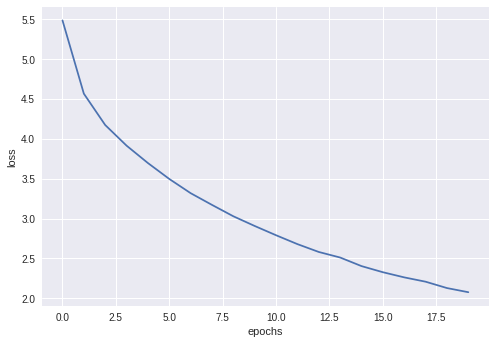

In [12]:
import matplotlib.pyplot as plt

plt.plot(hists)
plt.legend()
plt.xlabel("epochs")
plt.ylabel("loss")
plt.show()

Según el gráfico observamos que las pérdidas van disminuyendo a través de las épocas. Con lo que deduzco que podríamos seguir entrenando el modelo mientras sigan disminuyendo las pérdidas. Otra conclusión es que para la fase posterior, la de cargar un modelo para generar nuevas etiquetas usaría el modelo guardado en el archivo que corresponde a la última época, es decir, 'model_19.h5'.

Sin embargo, sólo con las pérdidas no podemos ver si estamos sufriendo overfiting. Voy por tanto a modificar el código anterior y a añadir un cjto de validación. Voy a usar para simplificar y no tardar demasiado en el entrenamiento el mismo conjunto de train (que recordamos que es el correspondiente a las FlickFlickr_8k.devImages.txt, de sólo 1000 imágenes) dividido en dos partes, la primera para train y la segunda para validación. Aunque los resultados serán malos, lo hago así para reducir tiempos y poder desarrollar el ejemplo. Además voy a guardar en el histórico tanto las pérdidas de train como las de validation, para después pintar un gráfico y ver cómo se comportan.

In [0]:
lTrainTotal = list(train)
# con los datos de train (estoy usando el fichero 'Flickr_8k.devImages.txt' en lugar de 'Flickr_8k.trainImages.txt' para agilizar el desarrollo de la práctica) voy
# a crear dos cjtos, uno para train y otro para validation
lTrain = lTrainTotal[0:500]
lVal = lTrainTotal[500:1000]
print('Longitud de Train: {}'.format(len(lTrain)))
print('Longitud de Val: {}'.format(len(lVal)))

Longitud de Train: 500
Longitud de Val: 500


In [0]:
# descriptions
train_descriptions = load_clean_descriptions('datalab/descriptions.txt', lTrain)
print('Descriptions: train=%d' % len(train_descriptions))
# photo features
train_features = load_photo_features('datalab/features.pkl', lTrain)
print('Photos: train=%d' % len(train_features))
# prepare tokenizer
tokenizer = create_tokenizer(train_descriptions)
vocab_size = len(tokenizer.word_index) + 1
print('Vocabulary Size: %d' % vocab_size)
# determine the maximum sequence length
maxlength = max_length(train_descriptions)
print('Description Length: %d' % maxlength)

# validation
# descriptions
val_descriptions = load_clean_descriptions('datalab/descriptions.txt', lVal)
print('Descriptions: val=%d' % len(val_descriptions))
# photo features
val_features = load_photo_features('datalab/features.pkl', lVal)
print('Photos: val=%d' % len(val_features))
# prepare tokenizer
val_tokenizer = create_tokenizer(val_descriptions)
vocab_size_val = len(val_tokenizer.word_index) + 1
print('Vocabulary Size Validation: %d' % vocab_size_val)
# determine the maximum sequence length: Lo adaptamos para que tenga la misma longitud que el cjto de train
maxlength_val = max_length(train_descriptions)
print('Description Length Validation: %d' % maxlength_val)
 
# define the model
model = define_model(vocab_size, maxlength)
# train the model, run epochs manually and save after each epoch
epochs = 20
# steps = len(train_descriptions) - 1
steps = 400
hists_dict = dict()
for i in range(epochs):
  # create the data generator
  generator = data_generator(train_descriptions, train_features, tokenizer, maxlength)
  # create the validation generator
  val_generator = data_generator(val_descriptions, val_features, val_tokenizer, maxlength_val)
  # fit for one epoch
  hist = model.fit_generator(generator, epochs=1, steps_per_epoch=steps, validation_data=val_generator, validation_steps=steps, verbose=1)
  # guardo las perdidas en un historico para ver qué modelo es mejor
  if 'loss' not in hists_dict:
				hists_dict['loss'] = list()
  if 'val_loss' not in hists_dict:
				hists_dict['val_loss'] = list()
      
  hists_dict['loss'].append(hist.history['loss'])
  hists_dict['val_loss'].append(hist.history['val_loss'])
  # save model
  # model.save('model_' + str(i) + '.h5')

Descriptions: train=500
Photos: train=500
Vocabulary Size: 2235
Description Length: 26
Descriptions: val=500
Photos: val=500
Vocabulary Size Validation: 2354
Description Length Validation: 26
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_41 (InputLayer)           (None, 26)           0                                            
__________________________________________________________________________________________________
input_40 (InputLayer)           (None, 4096)         0                                            
__________________________________________________________________________________________________
embedding_20 (Embedding)        (None, 26, 256)      572160      input_41[0][0]                   
__________________________________________________________________________________________________
dropout_39 (Drop

400/400 [==============================] - 55s 139ms/step - loss: 5.7957 - val_loss: 5.8956
Epoch 1/1
400/400 [==============================] - 51s 129ms/step - loss: 5.0221 - val_loss: 6.3357
Epoch 1/1
  7/400 [..............................] - ETA: 40s - loss: 4.6825

400/400 [==============================] - 51s 127ms/step - loss: 4.5496 - val_loss: 6.6813
Epoch 1/1
400/400 [==============================] - 52s 130ms/step - loss: 4.1675 - val_loss: 7.2343
Epoch 1/1
  2/400 [..............................] - ETA: 44s - loss: 3.9594

400/400 [==============================] - 52s 129ms/step - loss: 3.8058 - val_loss: 7.6969
Epoch 1/1
400/400 [==============================] - 52s 129ms/step - loss: 3.5120 - val_loss: 8.2790
Epoch 1/1
  5/400 [..............................] - ETA: 42s - loss: 3.1677

400/400 [==============================] - 52s 129ms/step - loss: 3.2718 - val_loss: 8.5040
Epoch 1/1
400/400 [==============================] - 51s 128ms/step - loss: 3.0518 - val_loss: 8.7715
Epoch 1/1
  7/400 [..............................] - ETA: 39s - loss: 2.7507

400/400 [==============================] - 51s 127ms/step - loss: 2.8630 - val_loss: 9.0210
Epoch 1/1
400/400 [==============================] - 52s 129ms/step - loss: 2.7107 - val_loss: 9.2978
Epoch 1/1


400/400 [==============================] - 52s 129ms/step - loss: 2.5489 - val_loss: 9.4272
Epoch 1/1
400/400 [==============================] - 52s 130ms/step - loss: 2.4186 - val_loss: 9.4603
Epoch 1/1
  4/400 [..............................] - ETA: 44s - loss: 2.4465

400/400 [==============================] - 52s 131ms/step - loss: 2.3016 - val_loss: 9.5711
Epoch 1/1
400/400 [==============================] - 52s 130ms/step - loss: 2.1800 - val_loss: 9.7122
Epoch 1/1
  6/400 [..............................] - ETA: 43s - loss: 1.8155

400/400 [==============================] - 52s 130ms/step - loss: 2.0845 - val_loss: 9.7603
Epoch 1/1
400/400 [==============================] - 52s 130ms/step - loss: 2.0440 - val_loss: 9.8434
Epoch 1/1
  8/400 [..............................] - ETA: 42s - loss: 1.8910

400/400 [==============================] - 52s 129ms/step - loss: 1.9620 - val_loss: 9.8917
Epoch 1/1
400/400 [==============================] - 52s 130ms/step - loss: 1.8816 - val_loss: 10.0506
Epoch 1/1
  3/400 [..............................] - ETA: 43s - loss: 1.4189

400/400 [==============================] - 52s 130ms/step - loss: 1.8003 - val_loss: 10.1335
Epoch 1/1
400/400 [==============================] - 52s 130ms/step - loss: 1.7402 - val_loss: 10.1754


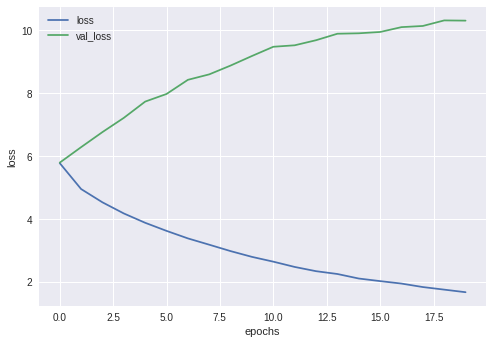

In [0]:
for label in ["loss","val_loss"]:
    plt.plot(hists_dict[label],label=label)
plt.legend()
plt.xlabel("epochs")
plt.ylabel("loss")
plt.show()

Con la gráfica observamos que se produce un claro overfiting.

** Evaluar el modelo **

OJO: El tokenizer que usamos para evaluar los datos de test tiene que ser el mismo que hemos usado para entrenar el modelo con los datos de train. Aprovecho también que lo he creado para guardarlo en datalab/tokenizer.pkl para después usarlo para generar nuevas descripciones sin necesidad de volver a realizar estos pasos.

Para evaluar el modelo cargo el que se creó en la última época cuando entrené con todas las imágenes del archivo 'FlickFlickr_8k.devImages.txt'.

La métrica que se usa en este caso es BLEU:

https://es.wikipedia.org/wiki/BLEU

In [14]:
from numpy import argmax
from pickle import load
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import load_model
from nltk.translate.bleu_score import corpus_bleu
 
# load doc into memory
def load_doc(filename):
	# open the file as read only
	file = open(filename, 'r')
	# read all text
	text = file.read()
	# close the file
	file.close()
	return text
 
# load a pre-defined list of photo identifiers
def load_set(filename):
	doc = load_doc(filename)
	dataset = list()
	# process line by line
	for line in doc.split('\n'):
		# skip empty lines
		if len(line) < 1:
			continue
		# get the image identifier
		identifier = line.split('.')[0]
		dataset.append(identifier)
	return set(dataset)
  
# load photo features
def load_photo_features(filename, dataset):
	# load all features
	all_features = load(open(filename, 'rb'))
	# filter features
	features = {k: all_features[k] for k in dataset}
	return features
 
# covert a dictionary of clean descriptions to a list of descriptions
def to_lines(descriptions):
	all_desc = list()
	for key in descriptions.keys():
		[all_desc.append(d) for d in descriptions[key]]
	return all_desc
 
# fit a tokenizer given caption descriptions
def create_tokenizer(descriptions):
	lines = to_lines(descriptions)
	tokenizer = Tokenizer()
	tokenizer.fit_on_texts(lines)
	return tokenizer
 
# calculate the length of the description with the most words
def max_length(descriptions):
	lines = to_lines(descriptions)
	return max(len(d.split()) for d in lines)
 
# map an integer to a word
def word_for_id(integer, tokenizer):
	for word, index in tokenizer.word_index.items():
		if index == integer:
			return word
	return None
 
# generate a description for an image
def generate_desc(model, tokenizer, photo, max_length):
	# seed the generation process
	in_text = 'startseq'
	# iterate over the whole length of the sequence
	for i in range(max_length):
		# integer encode input sequence
		sequence = tokenizer.texts_to_sequences([in_text])[0]
		# pad input
		sequence = pad_sequences([sequence], maxlen=max_length)
		# predict next word
		yhat = model.predict([photo,sequence], verbose=0)
		# convert probability to integer
		yhat = argmax(yhat)
		# map integer to word
		word = word_for_id(yhat, tokenizer)
		# stop if we cannot map the word
		if word is None:
			break
		# append as input for generating the next word
		in_text += ' ' + word
		# stop if we predict the end of the sequence
		if word == 'endseq':
			break
	return in_text
 
# evaluate the skill of the model
def evaluate_model(model, descriptions, photos, tokenizer, max_length):
	actual, predicted = list(), list()
	# step over the whole set
	for key, desc_list in descriptions.items():
		# generate description
		yhat = generate_desc(model, tokenizer, photos[key], max_length)
		# store actual and predicted
		references = [d.split() for d in desc_list]
		actual.append(references)
		predicted.append(yhat.split())
	# calculate BLEU score
	print('BLEU-1: %f' % corpus_bleu(actual, predicted, weights=(1.0, 0, 0, 0)))
	print('BLEU-2: %f' % corpus_bleu(actual, predicted, weights=(0.5, 0.5, 0, 0)))
	print('BLEU-3: %f' % corpus_bleu(actual, predicted, weights=(0.3, 0.3, 0.3, 0)))
	print('BLEU-4: %f' % corpus_bleu(actual, predicted, weights=(0.25, 0.25, 0.25, 0.25)))
 
# prepare tokenizer on train set
 
# load training dataset (6K)
# filename = 'Flickr8k_text/Flickr_8k.trainImages.txt'
filename = 'Flickr_8k.devImages.txt'
train = load_set(filename)
print('Dataset: %d' % len(train))
# descriptions
train_descriptions = load_descriptions_from_file('datalab/descriptions.txt', train)
print('Descriptions: train=%d' % len(train_descriptions))
# prepare tokenizer
tokenizer = create_tokenizer(train_descriptions)
# save the tokenizer: Para usarlo después cuando generemos nuevas descripciones a partir del modelo
dump(tokenizer, open('datalab/tokenizer.pkl', 'wb'))
vocab_size = len(tokenizer.word_index) + 1
print('Vocabulary Size: %d' % vocab_size)
# determine the maximum sequence length
maxlength = max_length(train_descriptions)
print('Description Length: %d' % maxlength)
 
# prepare test set
 
# load test set
filename = 'Flickr_8k.testImages.txt'
test = load_set(filename)
print('Dataset: %d' % len(test))
# descriptions
test_descriptions = load_descriptions_from_file('datalab/descriptions.txt', test)
print('Descriptions: test=%d' % len(test_descriptions))
# photo features
test_features = load_photo_features('datalab/features.pkl', test)
print('Photos: test=%d' % len(test_features))
 
# load the model
# filename = 'model-ep002-loss3.245-val_loss3.612.h5'
filename = 'model_19.h5'
model = load_model(filename)
# evaluate model
evaluate_model(model, test_descriptions, test_features, tokenizer, maxlength)

Dataset: 1000
Descriptions: train=1000
Vocabulary Size: 3317
Description Length: 31
Dataset: 1000
Descriptions: test=1000
Photos: test=1000
BLEU-1: 0.436500
BLEU-2: 0.214869
BLEU-3: 0.141643
BLEU-4: 0.057012


** Usar el modelo para generar nuevas descripciones **

Voy a coger una imágen de test y ver qué genera mi modelo para esa imágen.

In [0]:
# load the tokenizer
tokenizer = load(open('datalab/tokenizer.pkl', 'rb'))
# pre-define the max sequence length (from training)
maxlength = 31

In [0]:
# load the model
model = load_model('model_19.h5')

In [22]:
def extract_features_one_image(filename):
	# load the model
	model = VGG16()
	# re-structure the model
	model.layers.pop()
	model = Model(inputs=model.inputs, outputs=model.layers[-1].output)
	# load the photo
	image = load_img(filename, target_size=(224, 224))
	# convert the image pixels to a numpy array
	image = img_to_array(image)
	# reshape data for the model
	image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
	# prepare the image for the VGG model
	image = preprocess_input(image)
	# get features
	feature = model.predict(image, verbose=0)
	return feature
 
# load and prepare the photograph
photo = extract_features_one_image('Flicker8k_Dataset/1084040636_97d9633581.jpg')
# generate description
description = generate_desc(model, tokenizer, photo, maxlength)
print(description)

startseq dog leaps over chain endseq


(-0.5, 499.5, 374.5, -0.5)

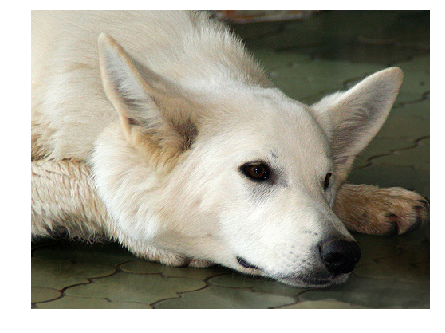

In [27]:
img = load_img('Flicker8k_Dataset/1084040636_97d9633581.jpg')
plt.imshow(img)
plt.axis('off')

Bueno, por lo menos ha detectado que es un perro!! :-)

In [34]:
!ls -la datalab/

total 133188
drwxr-xr-x 1 root root      4096 Jun 28 18:17 .
drwxr-xr-x 1 root root      4096 Jun 28 18:15 ..
drwxr-xr-x 4 root root      4096 Jun 25 16:59 .config
-rw-r--r-- 1 root root   2943284 Jun 28 17:31 descriptions.txt
-rw-r--r-- 1 root root 133296870 Jun 28 17:28 features.pkl
-rw-r--r-- 1 root root    125219 Jun 28 18:17 tokenizer.pkl


In [0]:
from google.colab import files
files.download('datalab/features.pkl')
files.download('datalab/descriptions.txt')
files.download('datalab/tokenizer.pkl')